In [1]:
%load_ext autoreload
%autoreload 2

import datajoint as dj

dj.config["display.limit"] = 50
dj.config["enable_python_native_blobs"] = True

dj.config['nnfabrik.schema_name'] = "nnfabrik_v1_tuning"

import datajoint as dj
schema = dj.schema("nnfabrik_v1_tuning")

from nnfabrik.main import *
import nnfabrik

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from nnvision.tables.from_nnfabrik import TrainedModel, DataInfo

fetch_download_path = '/data/fetched_from_attach'

Connecting pawelp@134.2.168.16:3306


# A bunch of new Tables

### Unit Tables

In [2]:
# Unit Tables: Identifies each Neuron within the model
from nnvision.tables.main import Recording

from nndichromacy.tables.from_mei import MEISelector

### Result Tables

In [3]:
from nndichromacy.tables.scores import TestCorrelation as TestCorrelationMouse

from nnvision.tables.scores import TestCorrelationScore as TestCorrelationMonkey

In [4]:
# let's start out with the monkeys in this example

monkey_key = dict(dataset_hash='a737408da40cfedd036c2eb1b8a31ff1')

In [5]:
Recording.populate(monkey_key, display_progress=True)

0it [00:00, ?it/s]


In [6]:
# overview of the dataset
Recording()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,brain_area some string,experiment_name another string,n_sessions,total_n_neurons
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,V1,CSRF19,32,458


In [7]:
# each unit has its own entry-
# unit index is the the actual index of the model, for the corresponding data_key
# unit ID is unique for each dataset
# electrode is the actual electrode channel where this neuron was recorded from, along with its depth relative to the most superficial channel

Recording.Units()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,data_key,unit_id,unit_type,unit_index,electrode,relative_depth
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,1,1,0,1,1710.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,2,1,1,2,1590.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,3,1,2,2,1590.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,4,1,3,2,1590.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,5,1,4,2,1590.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,6,1,5,3,1470.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,7,1,6,5,1230.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,8,1,7,5,1230.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,9,1,8,6,1110.0
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,3631807112901,10,1,9,7,990.0


In [8]:
TestCorrelationMonkey.populate(monkey_key, display_progress=True, limit=1)

  0%|          | 0/1 [00:00<?, ?it/s]/src/nnfabrik/nnfabrik/templates/trained_model.py:209: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(
100%|██████████| 1/1 [01:06<00:00, 66.11s/it]


In [9]:
# average score for the whole dataset
TestCorrelationMonkey()

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,test_correlation A template for a computed score of a trained model,test_correlation_ts UTZ timestamp at time of insertion
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,0.384761,2020-12-01 19:04:20
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,2000,0.386926,2020-12-02 09:31:05


In [10]:
# a score per neuron
TestCorrelationMonkey.Units()

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,data_key,unit_id,unit_type,unit_test_correlation A template for a computed unit score
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,1,1,0.333748
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,2,1,0.485169
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,3,1,0.618477
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,4,1,0.303775
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,5,1,0.174556
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,6,1,0.773369
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,7,1,0.364794
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,8,1,0.255139
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,9,1,0.283885
nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000,3631807112901,10,1,0.31327


# MEI tables

some rudimentary documentation can be found here:
    - https://github.com/sinzlab/mei

In [13]:
from nndichromacy.tables.from_mei import TrainedEnsembleModel

In [14]:
TrainedEnsembleModel().create_ensemble(key=monkey_key, comment='default')

DuplicateError: ("Duplicate entry 'nnvision.datasets.monkey_static_loader-a737408da40cfedd036c2e...' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [15]:
TrainedEnsembleModel()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,ensemble_comment a short comment describing the ensemble
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,default


In [16]:
TrainedEnsembleModel().Member()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,model_fn name of the model function,model_hash hash of the model configuration,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,1000
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,2000
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,3000
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,4000
nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,nnvision.models.se_core_point_readout,f8bcd882c48a55dc6cd6d7afb656f1f9,nnvision.training.nnvision_trainer,2a2816c50c67295376b4e89448430985,5000


# Adding a MEIMethod

In [17]:
from nndichromacy.tables.from_mei import MEIMethod

In [18]:
method_fn = 'mei.methods.gradient_ascent'
method_config = {'initial': {'path': 'mei.initial.RandomNormal'},
                 'optimizer': {'path': 'torch.optim.SGD', 'kwargs': {'lr': 1.5}},
                 'precondition': {'path': 'mei.legacy.ops.GaussianBlur',
                  'kwargs': {'sigma': 1}},
                 'postprocessing': {'path': 'mei.legacy.ops.ChangeNorm',
                  'kwargs': {'norm': 6.883}},
                 'stopper': {'path': 'mei.stoppers.NumIterations',
                  'kwargs': {'num_iterations': 1000}},
                 'objectives': [{'path': 'mei.objectives.EvaluationObjective',
                   'kwargs': {'interval': 10}}],
                 'device': 'cuda'}

In [19]:
MEIMethod().add_method(method_fn=method_fn, method_config=method_config, comment='norm=6.9, lr=1.5')

DuplicateError: ("Duplicate entry 'mei.methods.gradient_ascent-4f49ae3e50a41587cfc0ebdc39aaf25b' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [33]:
MEIMethod()

method_fn name of the method function,method_hash hash of the method config,method_config method configuration object,method_ts UTZ timestamp at time of insertion,method_comment a short comment describing the method
mei.methods.gradient_ascent,4f49ae3e50a41587cfc0ebdc39aaf25b,=BLOB=,2020-12-01 19:05:32,"norm=6.9, lr=1.5"


# The MEI Seed table

In [20]:
# it's just like the Seed table. It basically determines the path of optimization and the randomness of the starting image
from nndichromacy.tables.from_mei import MEISeed

MEISeed().insert1(dict(mei_seed=42))

DuplicateError: ("Duplicate entry '42' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [34]:
MEISeed()

mei_seed MEI seed
42


# The MEI table

In [21]:
from nndichromacy.tables.from_mei import TrainedEnsembleModel, MEISeed
from mei import mixins

# The MEI table puts the Unit table together with the other upstream tables.
# So you will need two MEI tables - One for mouse and one for monkey. They will only differ in the selector table.
# the code that defines the most of the MEI tables can be found in the mei.mixins module.

@schema
class MEIMonkey(mixins.MEITemplateMixin, dj.Computed):
    """MEI table template.

    To create a functional "MEI" table, create a new class that inherits from this template and decorate it with your
    preferred Datajoint schema. Next assign your trained model (or trained ensemble model) and your selector table to
    the class variables called "trained_model_table" and "selector_table". By default, the created table will point to
    the "MEIMethod" table in the Datajoint schema called "nnfabrik.main". This behavior can be changed by overwriting
    the class attribute called "method_table".
    """

    trained_model_table = TrainedEnsembleModel
    selector_table = Recording.Units
    method_table = MEIMethod
    seed_table = MEISeed

# Populate the MEI table

### let's get an MEI

In [22]:
# let's fetch the 5 neurons with the highest test correlation
unit_key, unit_test_correlation = (TestCorrelationMonkey().Units).fetch("KEY", "unit_test_correlation", limit=5, order_by="unit_test_correlation DESC")


In [23]:
unit_key

[{'model_fn': 'nnvision.models.se_core_point_readout',
  'model_hash': 'f8bcd882c48a55dc6cd6d7afb656f1f9',
  'dataset_fn': 'nnvision.datasets.monkey_static_loader',
  'dataset_hash': 'a737408da40cfedd036c2eb1b8a31ff1',
  'trainer_fn': 'nnvision.training.nnvision_trainer',
  'trainer_hash': '2a2816c50c67295376b4e89448430985',
  'seed': 1000,
  'data_key': '3634055946316',
  'unit_id': 3,
  'unit_type': 1},
 {'model_fn': 'nnvision.models.se_core_point_readout',
  'model_hash': 'f8bcd882c48a55dc6cd6d7afb656f1f9',
  'dataset_fn': 'nnvision.datasets.monkey_static_loader',
  'dataset_hash': 'a737408da40cfedd036c2eb1b8a31ff1',
  'trainer_fn': 'nnvision.training.nnvision_trainer',
  'trainer_hash': '2a2816c50c67295376b4e89448430985',
  'seed': 2000,
  'data_key': '3634055946316',
  'unit_id': 3,
  'unit_type': 1},
 {'model_fn': 'nnvision.models.se_core_point_readout',
  'model_hash': 'f8bcd882c48a55dc6cd6d7afb656f1f9',
  'dataset_fn': 'nnvision.datasets.monkey_static_loader',
  'dataset_hash':

In [24]:
unit_test_correlation

array([0.865452, 0.862951, 0.807527, 0.796873, 0.784964])

In [42]:
# because we only have one entry in the ense,ble table, seed table, and method table, if we just restrict the populate with the unit key, it will produce one MEI.
# it's best practice to always provide a key with all relevant primary keys: method_hash, mei_seed, ensemble_hash

MEIMonkey.populate(unit_key, display_progress=True, order='random', reserve_jobs=True)

100%|██████████| 1/1 [01:10<00:00, 70.42s/it]


In [43]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [44]:
MEIMonkey()

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,data_key,unit_id,unit_type,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
mei.methods.gradient_ascent,4f49ae3e50a41587cfc0ebdc39aaf25b,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,3631807112901,11,1,42,=BLOB=,6.34122,=BLOB=
mei.methods.gradient_ascent,4f49ae3e50a41587cfc0ebdc39aaf25b,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,3634055946316,3,1,42,=BLOB=,3.34759,=BLOB=
mei.methods.gradient_ascent,4f49ae3e50a41587cfc0ebdc39aaf25b,nnvision.datasets.monkey_static_loader,a737408da40cfedd036c2eb1b8a31ff1,e7a8d0b961ee37ffda0779bfed95f1cf,3639664527524,12,1,42,=BLOB=,5.56487,=BLOB=


- the MEI(as well as the output) is stored as an external (just like the models state dict. if we fetch it, we download the file, and we can then load it with torch.load)
- I usuallly download to a folder on the mapped /data volume. I added it to the first cell: 'fetch_download_path'
- the score is the final activation that the MEI elicited in the model

In [45]:
mei_paths, output_paths = MEIMonkey.fetch("mei", "output", download_path=fetch_download_path)

In [46]:
MEIs = np.stack([torch.load(path).detach().cpu().numpy().squeeze() for path in mei_paths])
evaluations = np.stack([torch.load(path)['mei.objectives.EvaluationObjective']["values"] for path in output_paths])
t_evaluations = np.stack([torch.load(path)['mei.objectives.EvaluationObjective']["times"] for path in output_paths])

# Plot Activations

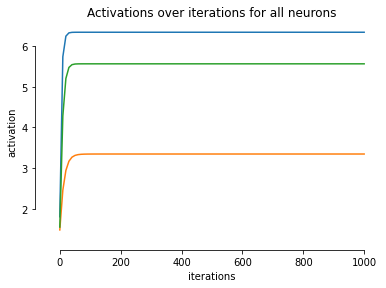

In [47]:
plt.plot(t_evaluations.T, evaluations.T)
sns.despine(trim=True, offset=10)
plt.xlabel("iterations")
plt.ylabel("activation")
plt.title("Activations over iterations for all neurons");

In [48]:
MEIs.shape

(3, 41, 41)

# Plot the MEIs

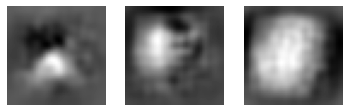

In [49]:
fig, axs = plt.subplots(1, len(MEIs))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(MEIs[i], cmap="gray")
    ax.axis("off")